# Chapter 16 - Introduction to Machine Learning 

Machine learning is a relatively new field compared to probability theory and statistics. The underlying idea is to have a system, or a software program, that learns based on data, i.e. produces a more effective behaviour or software output. With this goal in mind, we can use probabilities and model distributions, but we don't have to do that. We can use any method that optimises the output that we care about. 

Learning in animals or humans is an important inspiration for machine learning, but most machine learning does not actually aim to model natural behaviour. Human learning in particular is far from understood by science, but it is also not needed to build effective learning systems.

**Supervised machine learning** is the most common form of machine learning, and it is similar to estimation (see chapter 11-13). It is based on an **input** value (the independent variable) and **label** or **target** value (the dependent variable) we try to estimate or **predict**, as commonly said in machine learning. Estimation techniques such as linear or logistic regression are often considered as basic machine learning techniques. However, there are alternative techniques that take a simmpler approach but can also deal with more complex data, such as out first example: decision trees. 


### Example: Fitting a Decision Tree for Classification
We start by loading a dataset calles iris, which provides flower petal and sepal measurements as inputs and  three variants of iris, which are the class labels. Each input contains multiple values, called the features. Each input/target pair is called a sample or datapoint. 

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target_names)
print(iris.feature_names)
print('no of samples: ',len(iris.data))
print('sample 0 - input: ',iris.data[0], ', target: ',iris.target[0])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
no of samples:  150
sample 0 - input:  [5.1 3.5 1.4 0.2] , target:  0


This is the first input/target pair. The target_names relate to the number values, e.g., 0 in the example above indicates class 'setosa'. The task of predicting one of the 3 target values is called classification. The feature_names relate to the elements in the input, e.g. the first element is the **sepal length** in cm. 

We are now going to split the dataset into two parts, the training set for the model to learn and the test set that we use later to evaluate our model. 

In [17]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=538)
# 519 299

We can now fit a DecisionTreeClassifier to the samples in our dataset. This classifier follows a simple principle that it selects a feature and searches for a threshold so that it is most effective at discriminating the samples belonging to different classes. 

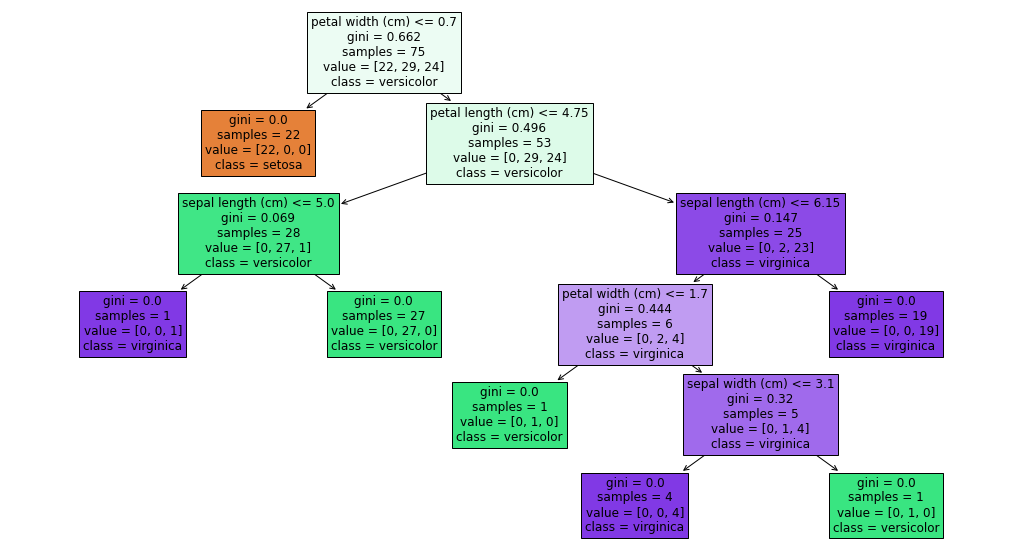

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
clf_full = tree.DecisionTreeClassifier(random_state=0)
clf_full.fit(X_train,y_train)
plt.figure(figsize=(18,10))
tree.plot_tree(clf_full,fontsize=12,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
pass

The diagram above shows the structure of the tree. Each internal node has a split rule, that determines whether smmples go into the left or right node below. When a node has no nodes connected below, it is called a **leaf** and has no split rule. The **gini** coefficient is an indicator how diverse the data in that node is, where gini value 0 indicates that there is only one class present. 

### Prediction and Accuracy

The trained model can then be used to predict for new values. The DecisionTreeClassifier class in Scikit Learn has a method `predict()` for that. We use the test set samples and compare the true class (from y_test) with the predicted class. In the case below they are the same, so the prediction is correct. 

In [ ]:
print(X_test[0],y_test[0],clf_full.predict(X_test[0:1]))

As a measure of prediction quality, we calculate **classification accuracy**, which is the proportiong of correctly predicted class labels for a dataset. This can be programmed in a loop as below.

In [ ]:
total = len(X_train)
correct = 0
for i in range(total):
    if y_train[i] == clf_full.predict(X_train[i:i+1]):
        correct = correct + 1
accuracy = correct / total
accuracy

As we can see, the training set predictions are all correct, as was already clear from the diagram. 



### Generalization, overfitting and regularization

As long the class labels as the same input values it is possible to break down each node to that the leaf contains only one class, as can be seen in the example above. The actual goal of machine learning is however, to make good predictions on new data that comes from the same process. To measure capability in practice, we use an empirical approach with separate test dataset. 

We created a separate test set earlier, which contains differnt data from the same source. We can also calculate the accuracy more simply in vectorised form.

In [19]:
import numpy as np
np.sum(np.equal(clf_full.predict(X_test),y_test))/len(X_test)

0.88

As we can see, the model gets only 88% of the test set right. This performance on unsee data (i.e. data not used in training the mode) is called **generalization**. The generalization performance in typically lower than the training set performance. This can be attributed to missing information in the input, i.e. missing features that would help the prediction and to truely random components in the target data. 

A model that fits perfectly to a training dataset data is often not ideal as it learns the specifics of the training set which do not necessarily apply to other data as in our test set. For example, in the tree shown above, we have one example of a 'versicolor' iris with a long and wide petal but a short and wide sepal in the lower right corner. This is not typical, however, as most 'versicolor' samples have short wide petals and long sepals. The special rule for one example is unlikely to  help for new samples. This effect is called **overfitting** a model.

**Regularisation** is a general term for techniques that prevent models from overfitting by limiting their ability to adapt. With a decision tree, a simple form of regularisation is to make the tree smaller. 

Below we allow only two levels in the tree, when we fit it to the training set. We see that 2 of the 3 leaves contain samples of multiple classes, so the model fits slightly worse to the training data and training accuracy will be lower. 

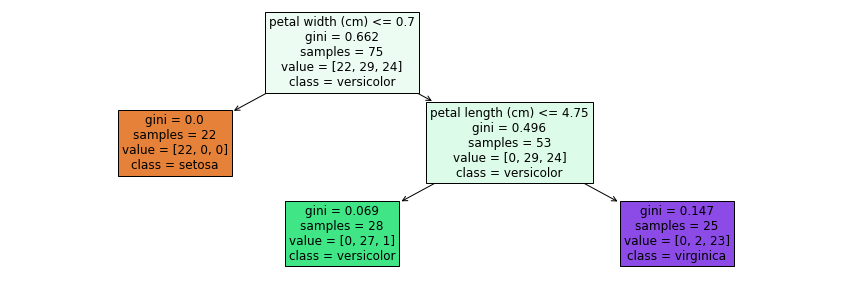

In [21]:
clf_small = tree.DecisionTreeClassifier(max_depth=2,random_state=0)
clf_small.fit(X_train,y_train)
plt.figure(figsize=(15,5))
tree.plot_tree(clf_small,fontsize=12,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
pass

When we calculate the test and training set accuracy for this simpler model on our test set, we see that the values are much closer and particularly the test result on the training set is better. This indicates that we have reduced overfitting and created a model that generalizes better.

In [23]:
# Training set accuracy
train_acc = 1-np.sum(np.abs(clf_small.predict(X_train)-y_train))/len(X_train)
# Test set accuracy 
test_acc = 1-np.sum(np.abs(clf_small.predict(X_test)-y_test))/len(X_test)
print("Training accuracy: ", train_acc, ", Test accuracy: ",test_acc)

Training accuracy:  0.96 , Test accuracy:  0.9466666666666667


In [ ]:
from sklearn import tree
#n_nodes = clf_full.tree_.node_count
#children_left = clf_full.tree_.children_left
#children_right = clf.tree_.children_right
#feature = clf.tree_.feature
#threshold = clf.tree_.threshold

# for i in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=i)
#     clf_full = tree.DecisionTreeClassifier(random_state=0)
#     clf_full.fit(X_train,y_train)
#     large_test_accuracy = 1-np.sum(np.abs(clf_full.predict(X_test)-y_test))/len(X_test)
#     if large_test_accuracy > 0.9:
#         continue
#     clf_small = tree.DecisionTreeClassifier(max_depth=2,random_state=0)
#     clf_small.fit(X_train,y_train)
#     # Training set accuracy
#     train_acc = 1-np.sum(np.abs(clf_small.predict(X_train)-y_train))/len(X_train)
#     # Test set accuracy 
#     test_acc = 1-np.sum(np.abs(clf_small.predict(X_test)-y_test))/len(X_test)
#     if test_acc < .92:
#         continue
#     print("i == ",i)
#     print("Large model - Test accuracy: ",large_test_accuracy)
#     print("Small model - Training accuracy: ", train_acc, ", Test accuracy: ",test_acc)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=158)
# clf_full = tree.DecisionTreeClassifier(random_state=0)
# clf_full.fit(X_train,y_train)
# large_test_accuracy = 1-np.sum(np.abs(clf_full.predict(X_test)-y_test))/len(X_test)
# clf_small = tree.DecisionTreeClassifier(max_depth=2)
# clf_small.fit(X_train,y_train)
# # Training set accuracy
# train_acc = 1-np.sum(np.abs(clf_small.predict(X_train)-y_train))/len(X_train)
# # Test set accuracy 
# test_acc = 1-np.sum(np.abs(clf_small.predict(X_test)-y_test))/len(X_test)
# print("Large model - Test accuracy: ",large_test_accuracy)
# print("Small model - Training accuracy: ", train_acc, ", Test accuracy: ",test_acc)